In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)


data = pd.read_csv('Datoscompletos3.csv',sep=";",parse_dates=[10],dayfirst=True)
data.head()

,id_reserva,Día de semana de fecha_venta,Hora de turno,canal,cpais_id,descuento,genero,provincia,tarifa,tipo_servicio,fecha_venta,familia,precio
0,1,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
1,2,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
2,3,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
3,4,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
4,5,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35


In [2]:
df_cantidad=(data.groupby(['Día de semana de fecha_venta','Hora de turno','descuento','fecha_venta','tipo_servicio','precio'])['id_reserva'].count().reset_index(name='cantidad'))

In [3]:
df_cantidad.head()

,Día de semana de fecha_venta,Hora de turno,descuento,fecha_venta,tipo_servicio,precio,cantidad
0,domingo,10,0,2017-02-26,tipo_servicio_4,43,1
1,domingo,10,0,2019-10-27,tipo_servicio_1,35,2
2,domingo,10,0,2019-12-01,tipo_servicio_1,35,3
3,domingo,10,0,2019-12-15,tipo_servicio_1,35,2
4,domingo,10,0,2020-01-26,tipo_servicio_1,35,2


In [4]:
df_cantidad.describe()

,Hora de turno,descuento,precio,cantidad
count,3398.000000,3398.000000,3398.000000,3398.000000
mean,16.034138,8.917010,35.067687,2.325486
std,3.283667,10.334622,0.788949,1.932479
min,10.000000,0.000000,35.000000,1.000000
25%,12.000000,0.000000,35.000000,1.000000
50%,16.000000,0.000000,35.000000,2.000000
75%,18.000000,20.000000,35.000000,3.000000
max,20.000000,25.000000,60.000000,37.000000


In [5]:
pd.concat([df_cantidad.fecha_venta, pd.get_dummies(df_cantidad.tipo_servicio)], axis=1).groupby(df_cantidad.fecha_venta).sum().reset_index(drop=True)

,tipo_servicio_1,tipo_servicio_2,tipo_servicio_3,tipo_servicio_4
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,2
...,...,...,...,...
939,0,0,2,0
940,0,0,2,0
941,0,0,1,0
942,0,0,1,0


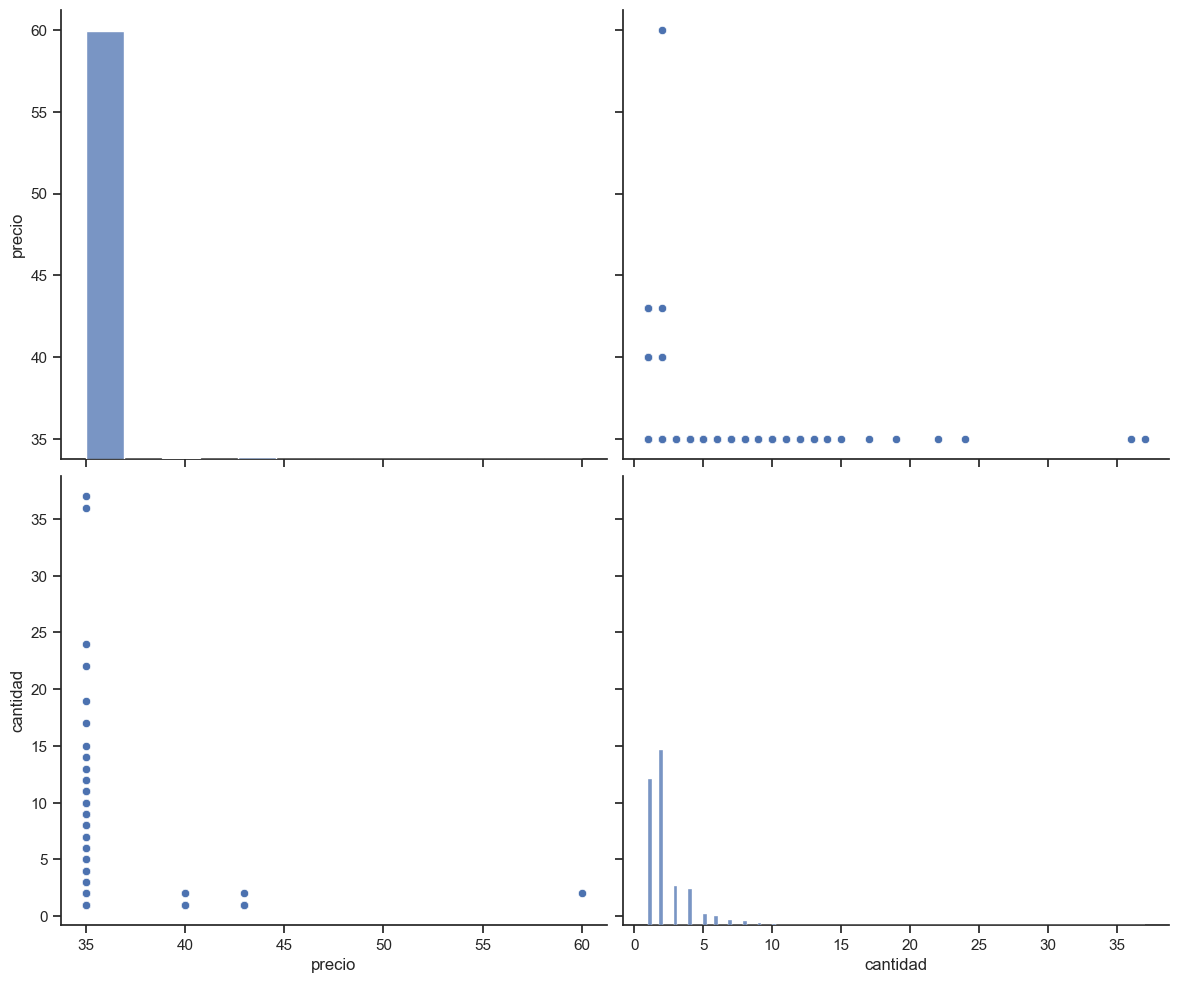

In [6]:
sns.pairplot(df_cantidad[['precio','cantidad']],height=5,aspect=1.2)

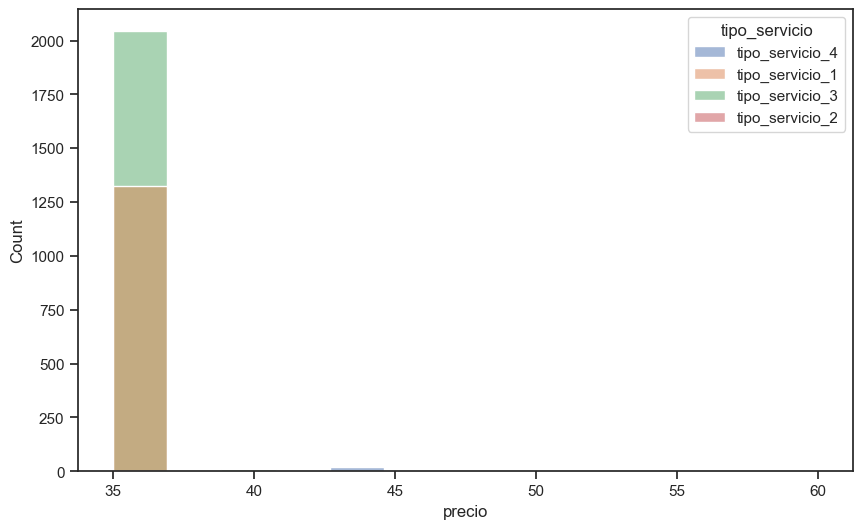

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.histplot(x='precio',data=df_cantidad,hue='tipo_servicio')

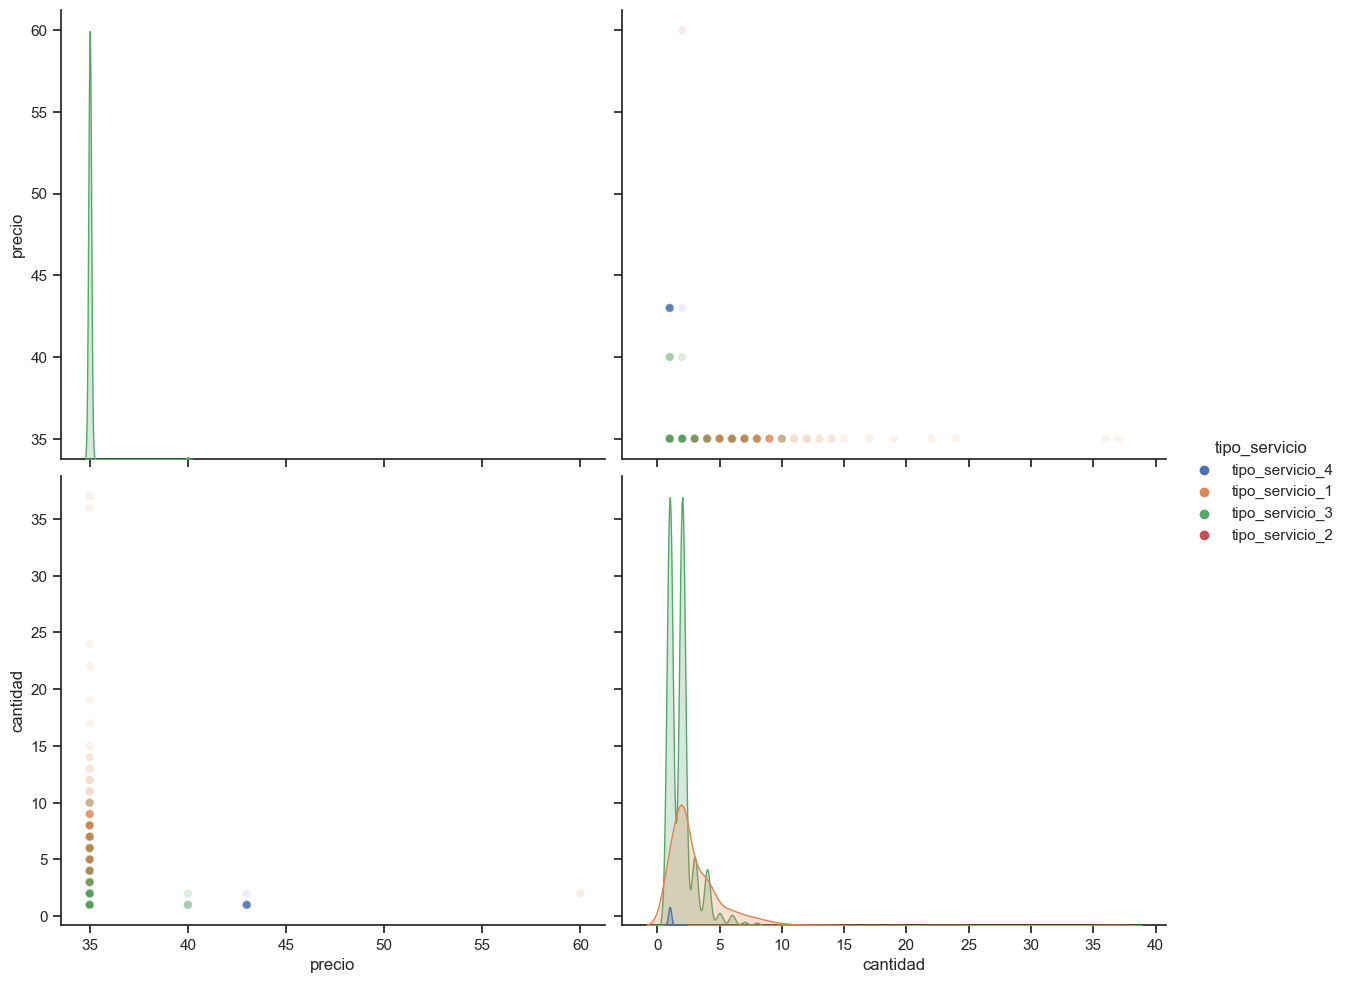

In [8]:
sns.pairplot(df_cantidad[['precio','cantidad','tipo_servicio']], hue = 'tipo_servicio', plot_kws={'alpha':0.1},height=5,aspect=1.2)

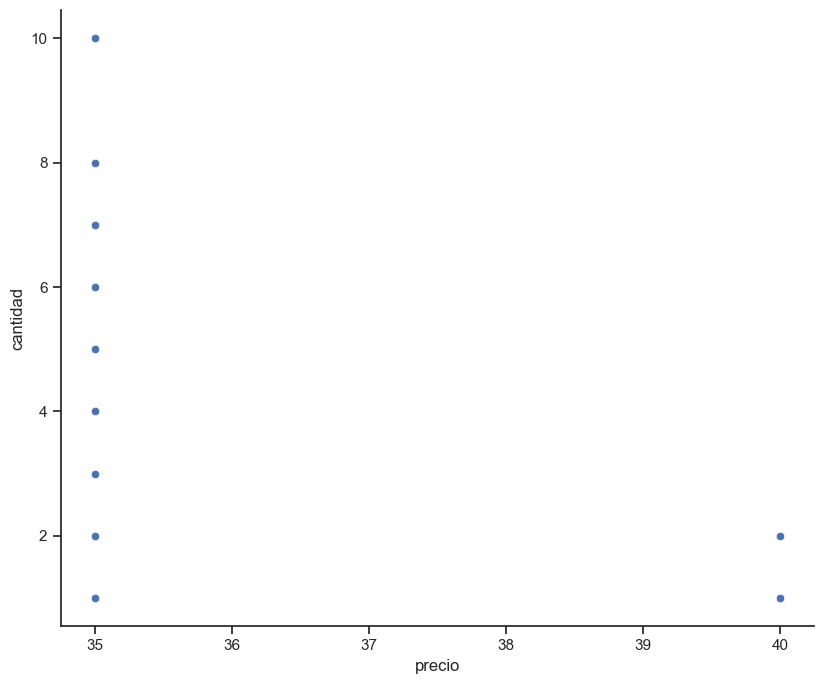

In [9]:
d = df_cantidad[df_cantidad['tipo_servicio']=='tipo_servicio_3']
sns.relplot(x=d['precio'],y=d['cantidad'],height=7,aspect=1.2)

In [10]:
df_cantidad['precio_total']=df_cantidad['precio']-(df_cantidad['precio']*(df_cantidad['descuento']/100))
d = df_cantidad[['fecha_venta','precio_total','cantidad']].sort_values(['fecha_venta'],ascending=True)
d['precio_total'] = (d['precio_total'] - d['precio_total'].mean())/((d['precio_total'].max() - d['precio_total'].min()))
d['cantidad'] = (d['cantidad'] - d['cantidad'].mean())/((d['cantidad'].max() - d['cantidad'].min()))

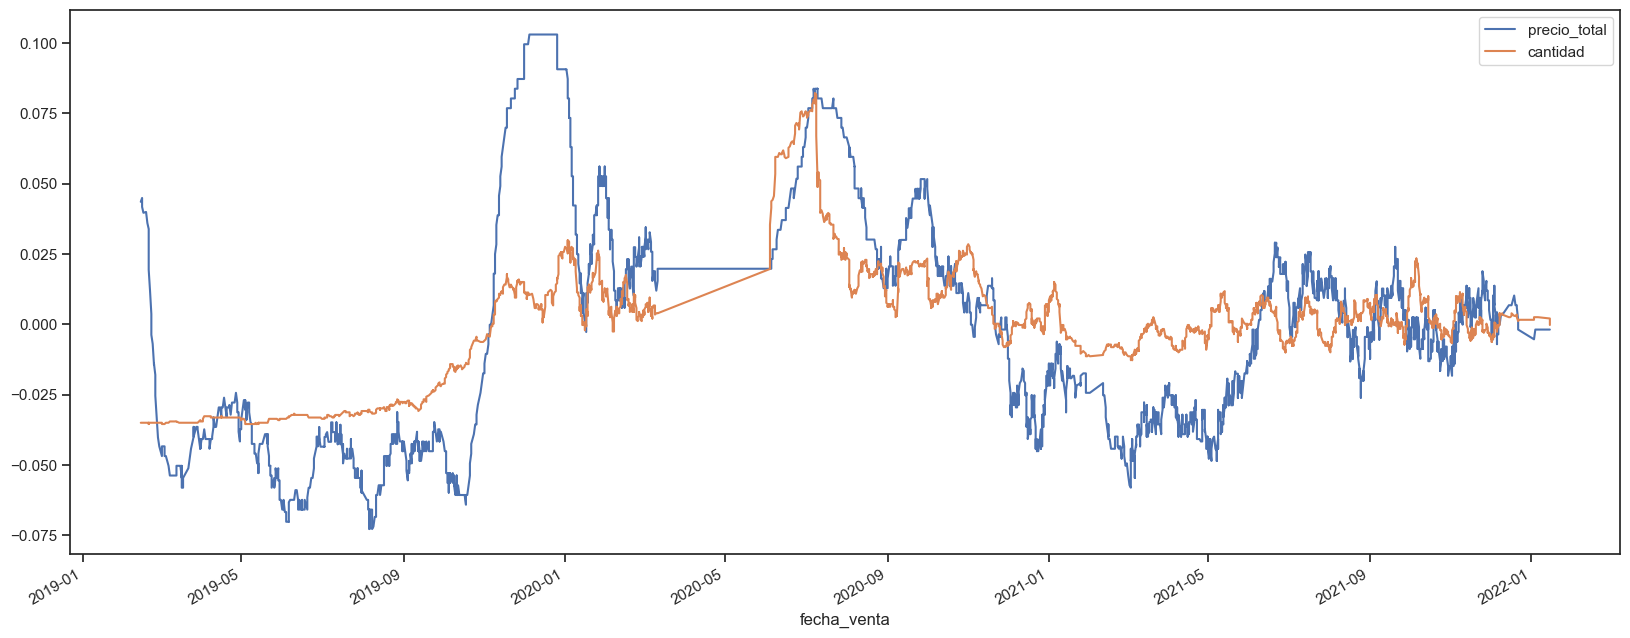

In [11]:
d.index = d['fecha_venta'] 
d = d.drop(['fecha_venta'],axis=1)
d.rolling(window=60).mean().plot(figsize=(20,8))

In [12]:
!pip install tabulate
df_cantidad_servicio_3 = df_cantidad[df_cantidad['tipo_servicio']=='tipo_servicio_3']
d3 = df_cantidad_servicio_3[['fecha_venta','precio_total','cantidad']].sort_values(['fecha_venta'],ascending=True)
d3['precio_total'] = (d3['precio_total'] - d3['precio_total'].mean())/((d['precio_total'].max() - d3['precio_total'].min()))
d3['cantidad'] = (d3['cantidad'] - d3['cantidad'].mean())/((d3['cantidad'].max() - d3['cantidad'].min()))
df_cantidad_servicio_3.head()


,Día de semana de fecha_venta,Hora de turno,descuento,fecha_venta,tipo_servicio,precio,cantidad,precio_total
8,domingo,10,0,2021-07-11,tipo_servicio_3,35,1,35.0
9,domingo,10,0,2021-07-25,tipo_servicio_3,35,1,35.0
13,domingo,10,0,2021-11-07,tipo_servicio_3,35,1,35.0
14,domingo,10,20,2019-03-17,tipo_servicio_3,35,1,28.0
15,domingo,10,20,2019-03-31,tipo_servicio_3,35,1,28.0


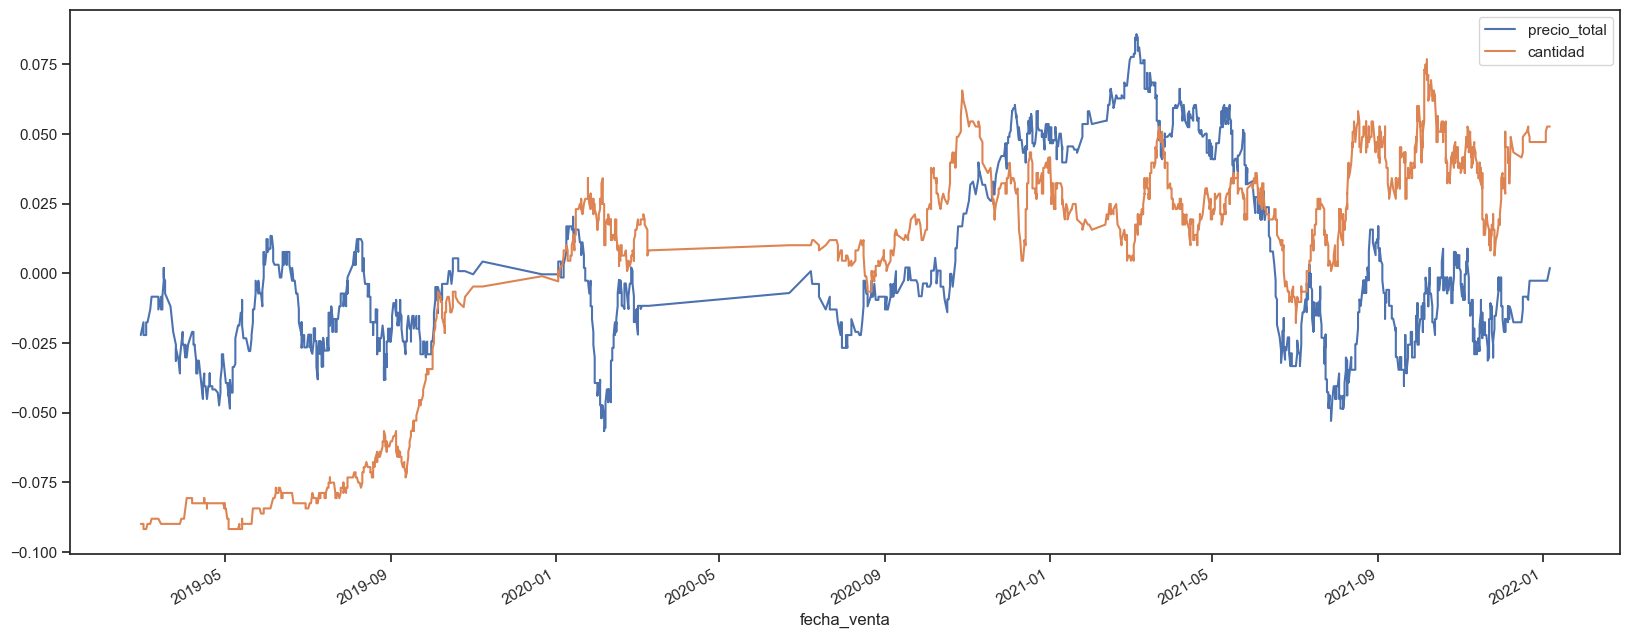

In [13]:
d3.index = d3['fecha_venta'] 
d3 = d3.drop(['fecha_venta'],axis=1)
d3.rolling(window=60).mean().plot(figsize=(20,8))

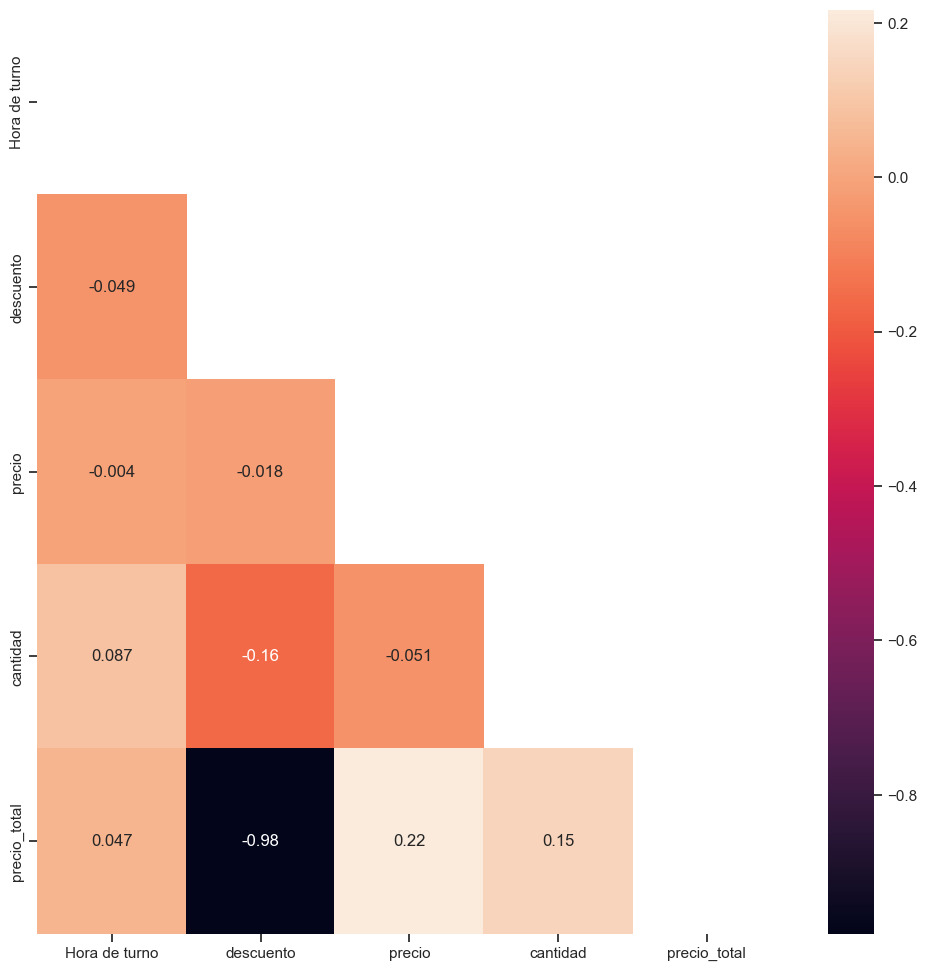

In [14]:
import numpy as np
df_corr = df_cantidad.drop(['fecha_venta'],axis=1).corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
df_corr = df_corr.mask(mask).round(3)
fig, ax = plt.subplots(figsize=(12,12))    
sns.heatmap(df_corr, annot=True,ax=ax)

In [15]:
df_tipo_servicio_3_data = df_cantidad[df_cantidad['tipo_servicio']=='tipo_servicio_3']
df_tipo_servicio_3_data.head()

,Día de semana de fecha_venta,Hora de turno,descuento,fecha_venta,tipo_servicio,precio,cantidad,precio_total
8,domingo,10,0,2021-07-11,tipo_servicio_3,35,1,35.0
9,domingo,10,0,2021-07-25,tipo_servicio_3,35,1,35.0
13,domingo,10,0,2021-11-07,tipo_servicio_3,35,1,35.0
14,domingo,10,20,2019-03-17,tipo_servicio_3,35,1,28.0
15,domingo,10,20,2019-03-31,tipo_servicio_3,35,1,28.0


In [16]:
model = ols("cantidad ~ precio_total", df_tipo_servicio_3_data).fit()

In [17]:
elasticidad_del_precio = model.params[1]
print("Elasticidad del producto: " + str(elasticidad_del_precio))
print(model.summary())

Elasticidad del producto: -0.043513250280548435
                            OLS Regression Results                            
Dep. Variable:               cantidad   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     36.97
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.43e-09
Time:                        00:01:59   Log-Likelihood:                -3112.4
No. Observations:                2052   AIC:                             6229.
Df Residuals:                    2050   BIC:                             6240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------


eval_env: 1
eval_env: 1


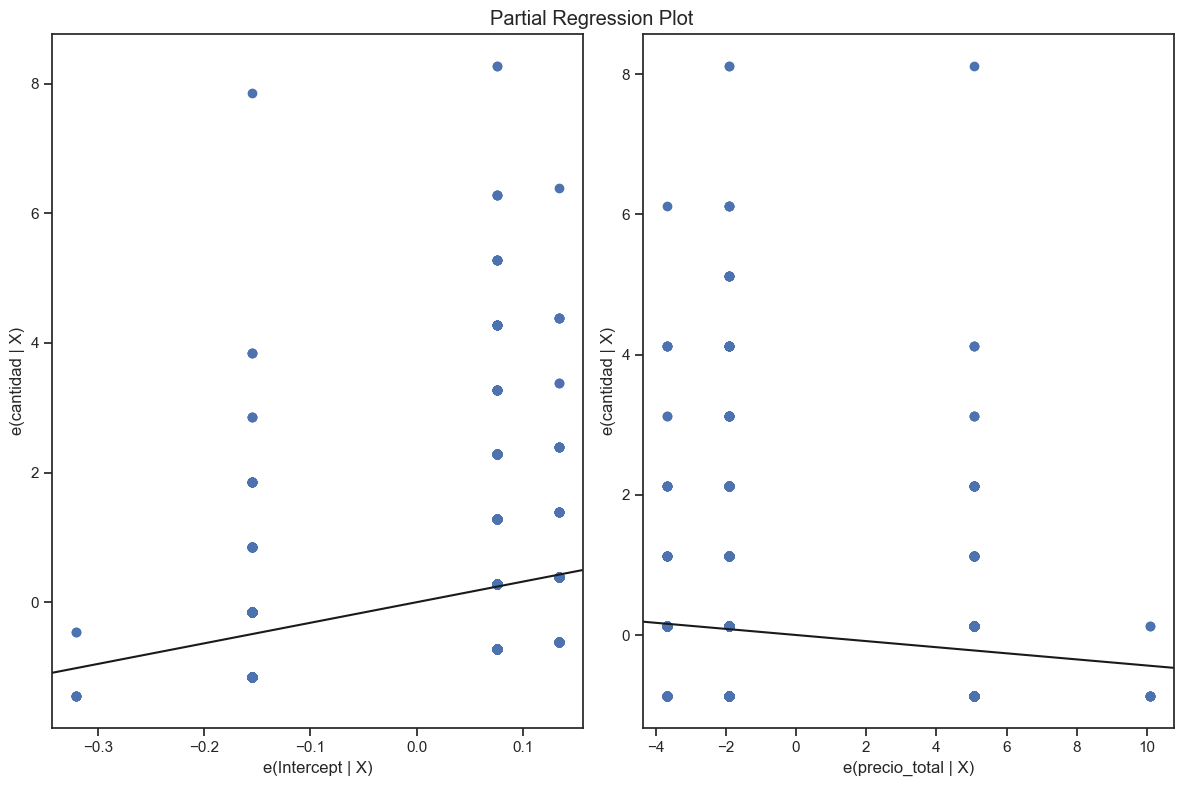

In [18]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [19]:
def crear_modelo_y_buscar_elasticidad(data):
    model = ols("cantidad ~ precio_total", data).fit()
    elasticidad_precio = model.params[1]
    print("Elasticidad del producto: " + str(elasticidad_precio))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return elasticidad_precio, model

tipo_servicio tipo_servicio_4
Elasticidad del producto: 0.009552151070943043
                            OLS Regression Results                            
Dep. Variable:               cantidad   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7922
Date:                Tue, 14 Feb 2023   Prob (F-statistic):              0.385
Time:                        00:01:59   Log-Likelihood:                 2.5222
No. Observations:                  20   AIC:                            -1.044
Df Residuals:                      18   BIC:                            0.9471
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

ValueError: resids must contain at least 2 elements

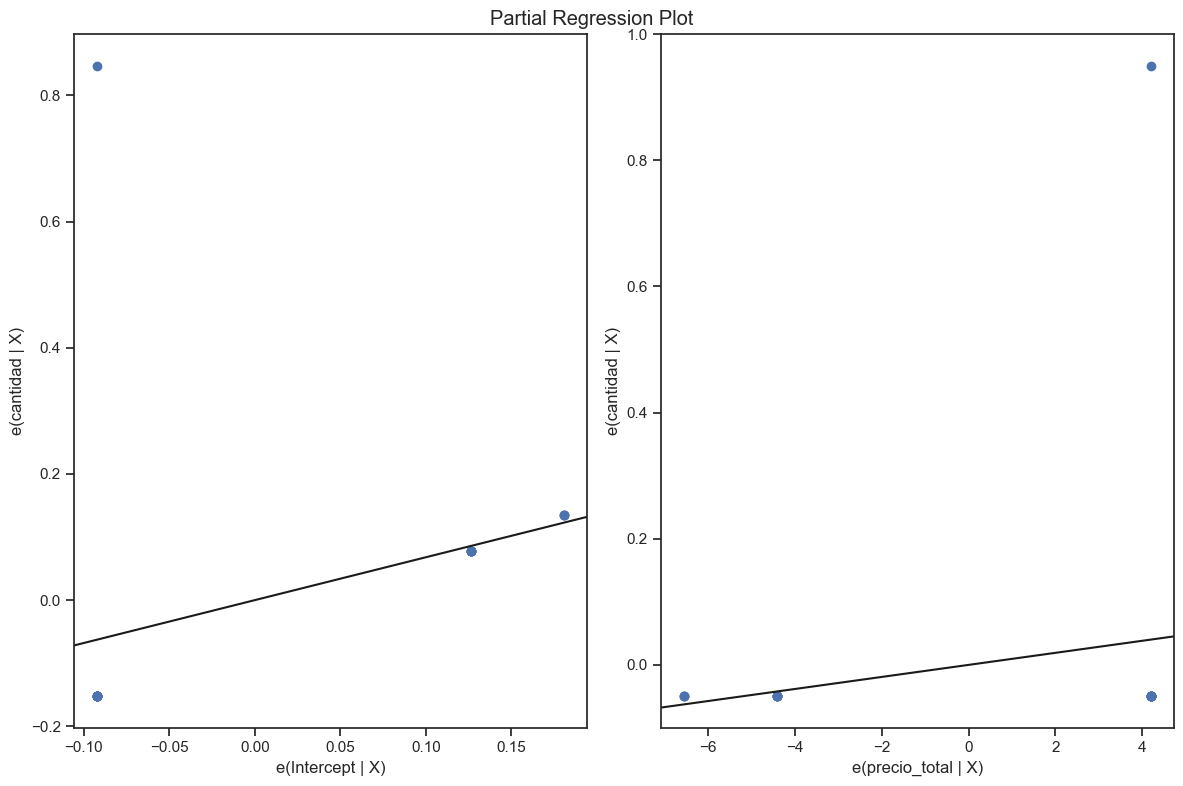

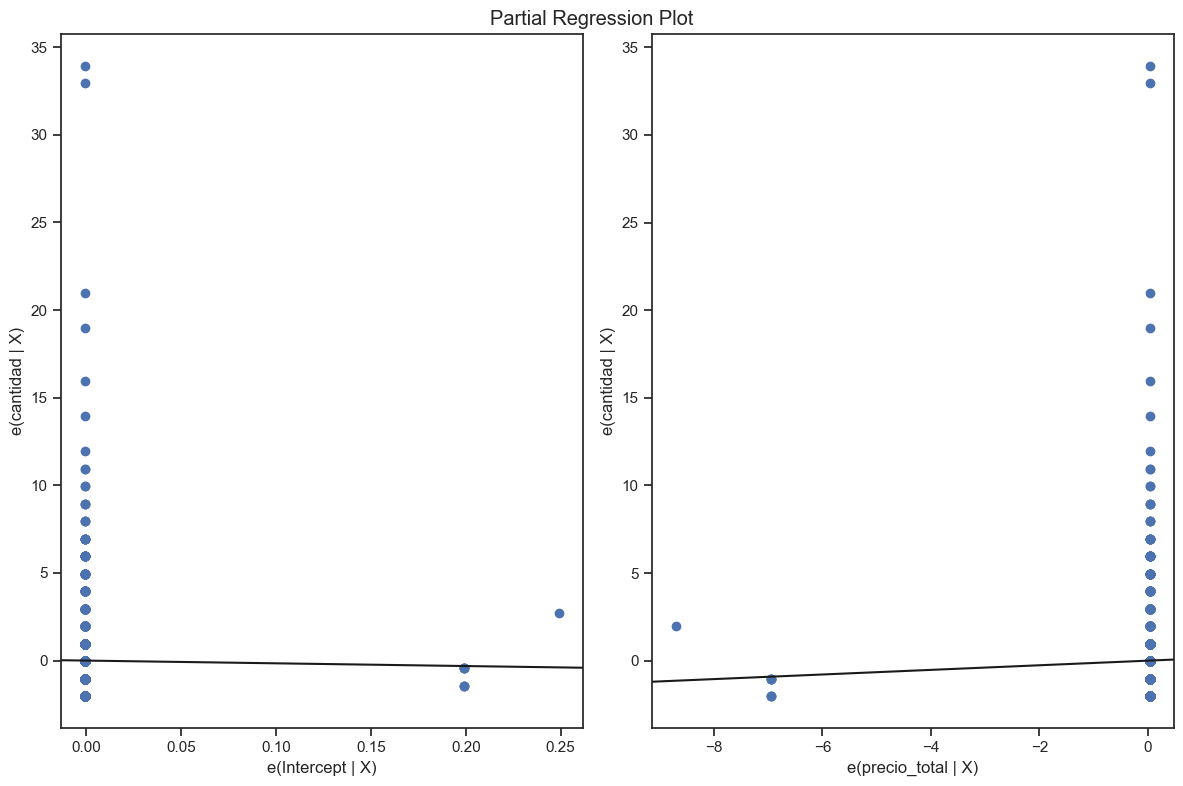

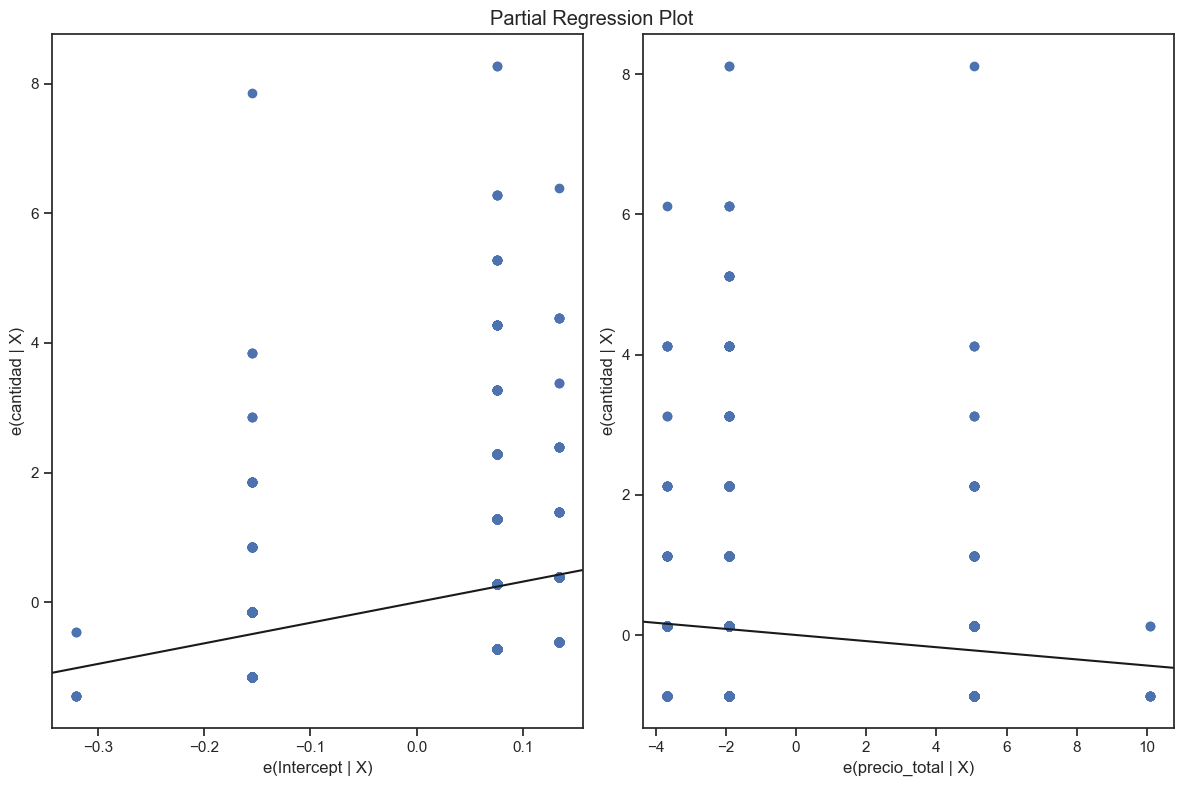

In [20]:
elasticidades = {}
modelos = {}
for tipo_servicio in df_cantidad['tipo_servicio'].unique():
  print('tipo_servicio',tipo_servicio)
  elasticidad_precio, modelo = crear_modelo_y_buscar_elasticidad(df_cantidad[df_cantidad['tipo_servicio']==tipo_servicio])
  elasticidades[tipo_servicio] = elasticidad_precio
  modelos[tipo_servicio]= modelo

In [21]:
modelos

{'tipo_servicio_4': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1348c2ab640>,
 'tipo_servicio_1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1348c7ef7f0>,
 'tipo_servicio_3': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1348d1daeb0>}

In [29]:
precio_minimo = df_tipo_servicio_3_data.precio_total.min() - 1
precio_maximo = df_tipo_servicio_3_data.precio_total.max() + 10
test = pd.DataFrame(columns = ["precio_total", "cantidad"])
test['precio_total'] = np.arange(precio_minimo, precio_maximo,0.01)
test['cantidad'] = modelos['tipo_servicio_3'].predict(test['precio_total'])
test['ingresos'] = test["precio_total"]  * test["cantidad"]


Valores optimos:
      precio_total  cantidad   ingresos
1127         36.52  1.588822  58.023787


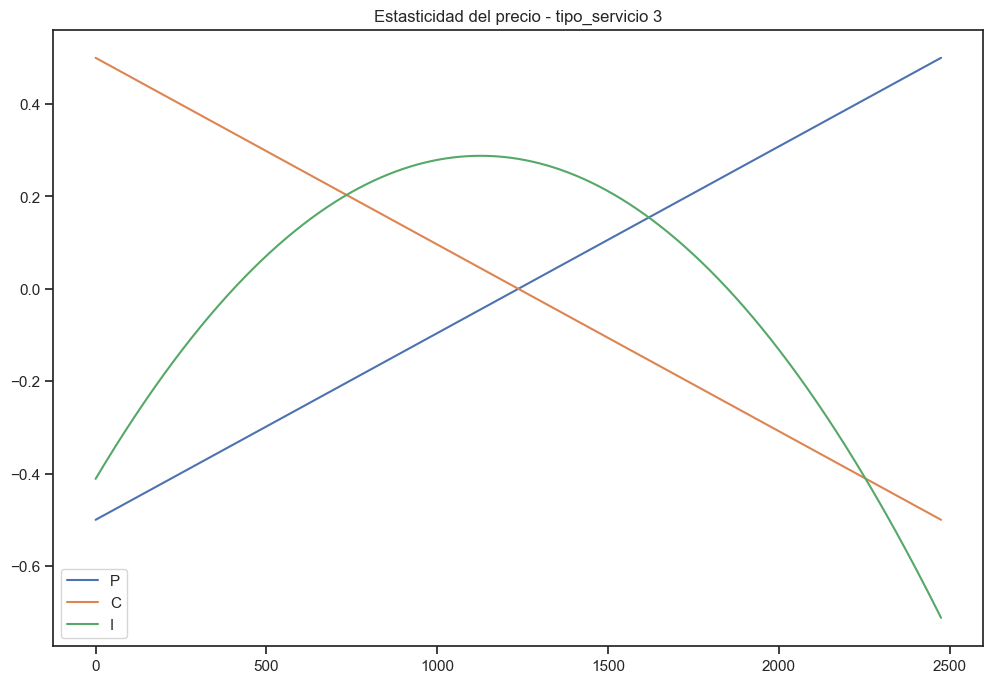

In [30]:
test['P'] = (test['precio_total']-test['precio_total'].mean())/(test['precio_total'].max()-test['precio_total'].min())
test['C'] = (test['cantidad']-test['cantidad'].mean())/(test['cantidad'].max()-test['cantidad'].min())
test['I'] = (test['ingresos']-test['ingresos'].mean())/(test['ingresos'].max()-test['ingresos'].min())
test[['P','C','I']].plot(figsize=(12,8),title='Estasticidad del precio - tipo_servicio 3')
ing = np.where(test['ingresos'] == test['ingresos'].max())[0][0]
valores_maximo_beneficio = test.drop(['P','C','I'],axis=1).iloc[[ing]]
print("Valores optimos:")
print(valores_maximo_beneficio)